# Examining the signals

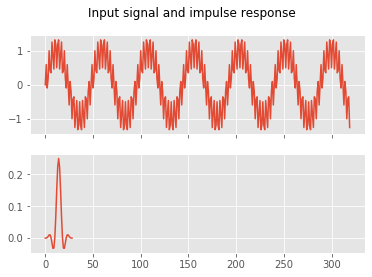

In [4]:
from matplotlib import pyplot as plt
import mysignals as sigs
from matplotlib import style


style.use('ggplot')

f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(sigs.Impulse_response)
plt.show()

# Convolution Process

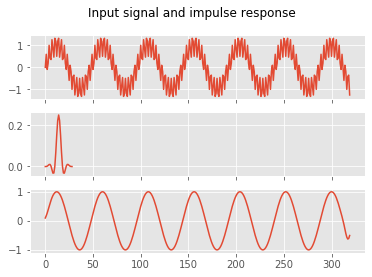

In [5]:
from scipy import signal

output_signal = signal.convolve(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response,mode='same')

f, plt_arr =plt.subplots(3,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(sigs.Impulse_response)
plt_arr[2].plot(output_signal)
plt.show()

# Developing the convolution algorithm

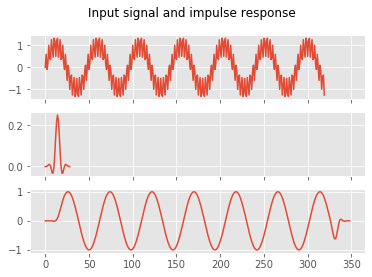

In [9]:
def convolution(src,imp_resp,dest):
    for x in range(len(src)+len(imp_resp)):
        dest[x] = 0
    for x in range(len(src)):
        for y in range(len(imp_resp)):
            dest[x+y] = dest[x+y] + src[x]*imp_resp[y]
            
output_signal = [None]*349
convolution(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response,output_signal)

f, plt_arr =plt.subplots(3,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(sigs.Impulse_response)
plt_arr[2].plot(output_signal)
plt.show()
    

# De-convolution of two signals

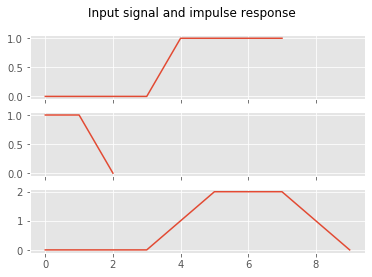

In [12]:
import numpy as np

sig = np.array([0,0,0,0,1,1,1,1])
kernel = np.array([1,1,0])
conv_res = signal.convolve(sig,kernel)
f, plt_arr =plt.subplots(3,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sig)
plt_arr[1].plot(kernel)
plt_arr[2].plot(conv_res)
plt.show()

[0 0 0 0 1 2 2 2 1 0]

(array([0., 0., 0., 0., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


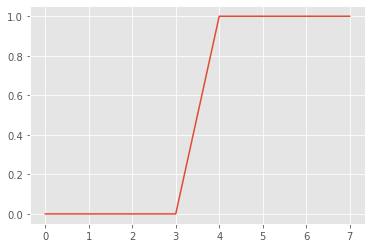

In [19]:
deconv_result = signal.deconvolve(conv_res,kernel)
print(conv_res)
print()
print(deconv_result)
plt.plot(deconv_result[0])

# Correlation

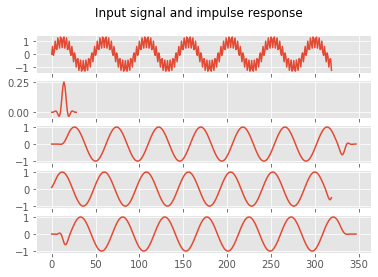

In [22]:
corr_output = signal.correlate(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response)
cross_conv = signal.correlate(sigs.Impulse_response,sigs.InputSignal_1kHz_15kHz)
conv_output = signal.convolve(sigs.InputSignal_1kHz_15kHz,sigs.Impulse_response,mode='same')
f, plt_arr =plt.subplots(5,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(sigs.Impulse_response)
plt_arr[2].plot(corr_output)
plt_arr[3].plot(conv_output)
plt_arr[4].plot(cross_conv)
plt.show()

# Compute the running sum

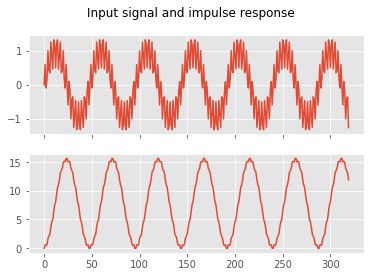

In [25]:
out_sig = np.cumsum(sigs.InputSignal_1kHz_15kHz)

f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(out_sig)


# Developing the running sum algorithm

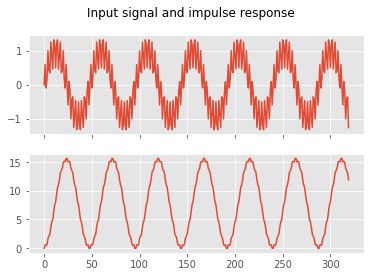

In [27]:
def running_sum(src,dest):
    for i in range(len(dest)):
        dest[i] = 0
    dest[0]=src[0]
    for x in range(1,len(src)):
        dest[x] = dest[x-1] + src[x] 
dest = [None] * 320
running_sum(sigs.InputSignal_1kHz_15kHz,dest)
f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(dest)

# Compute the first difference

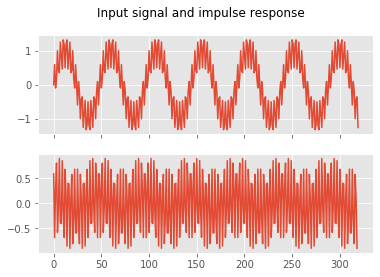

In [28]:
out_sig = np.diff(sigs.InputSignal_1kHz_15kHz)

f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(out_sig)

# Developing first difference algorithm

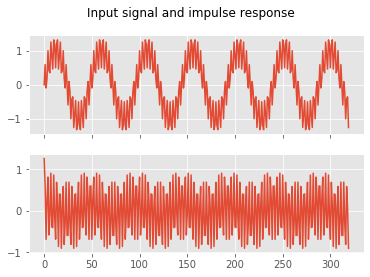

In [35]:
def first_diff(src,dest):
    for i in range(len(dest)):
        dest[i] = 0
    for x in range(len(src)):
        dest[x] = src[x] - src[x-1] 
dest = [None] * 320
first_diff(sigs.InputSignal_1kHz_15kHz,dest)
f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(dest)